# Módulo 04 - Detecção e Reconhecimento Facial

A face é crucial na interação visual, sendo capaz de revelar informações não-verbais valiosas, como identificação, intenções e sentimentos, presentes em expressões faciais humanas. A análise de expressões faciais se torna uma área fascinante para quem estuda visão computacional, pois intersecta campos como reconhecimento de objetos, tratamento de imagens e identificação ou rastreio de pontos característicos (*landmarks*).

**Este notebook tem como foco a análise, detecção e reconhecimento facial**, um campo que tem ganhado destaque na área de inteligência artificial, uma vez que é possível obter uma riqueza de dados a partir de rostos por meio de algoritmos de visão computacional.

![Imagens](img/m04.png)

Este notebook faz parte do programa da [Especialização em Visão Computacional](https://escola.sigmoidal.ai/especializacao-em-visao-computacional).

## Evolução dos Algoritmos de Detecção de Rosto

Ao longo do tempo, diversos algoritmos de detecção de rosto têm sido desenvolvidos, cada um com seus méritos e aplicações específicas. Iniciantes na área podem se sentir sobrecarregados pela diversidade de tutoriais disponíveis - uns focando em Haar Cascades, outros na biblioteca dlib e, mais recentemente, a ascensão do MediaPipe, que tem ganhado destaque a ponto de ofuscar alternativas tradicionais como o SSD (*Single Shot Multibox Detector*).

Para ilustrar essa evolução e ajudar na compreensão desse campo, a figura abaixo (retirada do artigo [What is Face Detection](https://learnopencv.com/what-is-face-detection-the-ultimate-guide/)) oferece um panorama dos algoritmos ao longo do tempo. **Mas como navegar por essa variedade sem se perder? Como tomar a melhor decisão para sua aplicação?**

![Imagens](img/timeline-of-face-detection-methods.png)


### Escolhendo o modelo ideal

O modelo perfeito para detecção facial deve alinhar-se com os requisitos únicos do seu projeto. O autor do artigo mencionado sugere que a decisão deve ser pautada por três critérios fundamentais:

**Precisão de Detecção Superior:** Caso a prioridade seja capturar cada rosto com a maior precisão possível, os algoritmos DSFD ou RetinaFace-resnet50 emergem como as melhores escolhas. No entanto, é preciso estar ciente de que a alta complexidade de tais modelos resulta em uma velocidade de inferência reduzida, o que pode ser um empecilho para aplicações que exigem resposta em tempo real.

**Velocidade de Detecção Máxima:** Se o que importa é a rapidez da inferência, mesmo que isso signifique perder algumas detecções em cenários complexos, a solução de detecção facial do MediaPipe é a alternativa ideal.

**Melhor custo beneficio  entre velocidade e precisão:** Para aqueles que procuram um meio-termo, os modelos YuNet e RetinaFace-Mobilenetv1 apresentam-se como candidatos equilibrados. Eles oferecem uma velocidade de inferência rápida, adequada para aplicações em tempo real, sem sacrificar demasiadamente a precisão.

Selecionar o algoritmo correto é um passo decisivo que pode determinar o sucesso da sua aplicação. Neste módulo, nós usaremos **TODO**.


In [1]:
import cv2
import numpy as np
import sigmoidal as sig

In [2]:
def detect_faces(
    model: cv2.dnn_Net,
    frame: np.ndarray
) -> np.ndarray:
    """
    Detecta rostos em uma imagem utilizando um modelo de rede neural pré-treinado.

    Parâmetros:
        model (cv2.dnn_Net): Modelo pré-treinado de detecção de rostos no formato Caffe.
        frame (np.ndarray): Imagem de entrada onde os rostos serão detectados.

    Retorno:
        np.ndarray: Matriz contendo as detecções, onde cada detecção é representada por uma linha 
                    contendo informações como as coordenadas do retângulo delimitador e a 
                    confiança da detecção.

    Exemplo:
        detections = detect_faces(model, frame)
    """
    # Cria um blob a partir da imagem
    blob = cv2.dnn.blobFromImage(cv2.resize(
        frame, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

    # Define o blob como entrada para o modelo
    model.setInput(blob)

    # Executa uma passagem para frente (forward pass) através do modelo
    detections = model.forward()

    return detections

In [3]:
def process_detections(
    detections: np.ndarray,
    frame: np.ndarray,
    confidence_threshold: float = 0.5
) -> np.ndarray:
    """
    Processa as detecções retornadas pelo modelo de detecção de rostos, desenhando os retângulos
    delimitadores e adicionando as informações de confiança.

    Parâmetros:
        detections (np.ndarray): Matriz contendo as detecções, onde cada detecção é representada por uma linha 
                                 contendo informações como as coordenadas do retângulo delimitador e a 
                                 confiança da detecção.
        frame (np.ndarray): Imagem de entrada onde os rostos foram detectados.
        confidence_threshold (float): Limiar de confiança para considerar uma detecção válida.

    Retorno:
        np.ndarray: Matriz contendo as detecções processadas, onde cada detecção é representada por uma linha 
                    contendo informações como as coordenadas do retângulo delimitador e a 
                    confiança da detecção.

    Exemplo:
        detections = process_detections(detections, frame)
    """
    # Obtém as dimensões da imagem
    (h, w) = frame.shape[:2]

    # Inicializa a lista de detecções
    detections_list = []

    # Itera sobre as detecções
    for i in range(0, detections.shape[2]):
        # Extrai a confiança (i.e., probabilidade) associada com a detecção
        confidence = detections[0, 0, i, 2]

        # Filtra as detecções fracas garantindo que a confiança seja maior que o limiar de confiança
        if confidence > confidence_threshold:
            # Computa as coordenadas (x, y) do retângulo delimitador para o objeto
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])

            # Converte as coordenadas do retângulo delimitador para inteiros
            (startX, startY, endX, endY) = box.astype("int")

            # Extrai a região de interesse (ROI) da face
            face = frame

In [4]:
def load_model(
    model_path: str,
    config_path: str
) -> cv2.dnn_Net:
    """
    Carrega um modelo de rede neural pré-treinado.

    Parâmetros:
        model_path (str): Caminho para o arquivo contendo o modelo pré-treinado.

    Retorno:
        cv2.dnn_Net: Modelo pré-treinado de detecção de rostos no formato Caffe.

    Exemplo:
        model = load_model(model_path)
    """
    # Carrega o modelo
    model = cv2.dnn.readNetFromCaffe(config_path, model_path)

    return model

In [5]:
img = cv2.imread('data/carlos.jpg')

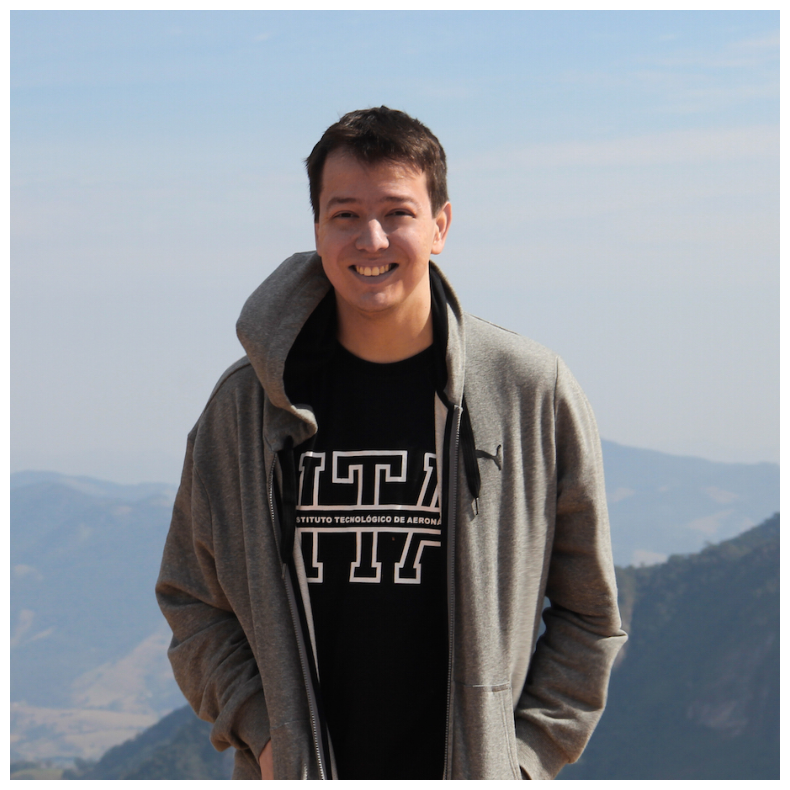

In [7]:
sig.plot_image(img)